In [11]:
import tensorflow as tf
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [12]:
data = pd.read_csv("/content/drive/MyDrive/CSV Dataset Projects/Dataset/2 Minutes 28 Subjects Data for Processing.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,2,5,6,9,10,13,14,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
data.shape

(1025304, 21)

In [9]:
data.sample(5)

,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,...,Alpha_TP10,Beta_TP9,Beta_AF7,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF7,Gamma_AF8,Gamma_TP10,PSS Score
735365,0.738923,1.515132,-0.058132,0.754795,0.186994,-0.093615,-0.015345,0.376821,0.339188,0.620006,...,0.603097,0.432190,0.784828,-0.140514,0.791222,0.061467,0.726,-0.665846,0.327549,14
928751,0.589707,1.120969,0.790408,0.303554,0.201549,0.725878,0.08208,-0.008506,0.861845,0.433713,...,0.492528,0.458377,-0.389557,-0.252649,0.453730,-0.045672,-0.367455,0.236402,-0.168225,30
928050,0.451100,0.77334,0.683708,0.517168,0.269983,0.602519,-0.260741,0.220863,0.632503,0.613249,...,0.850940,0.269075,-0.337929,-0.431955,0.310624,-0.169167,-0.348392,0.056753,-0.025024,30
219707,1.085652,1.313732,1.460981,1.390046,0.405797,0.724081,0.748317,0.596709,0.940882,0.869671,...,0.926699,0.797705,0.562565,0.574983,0.841546,0.341263,0.321341,0.439886,0.527125,23
468934,0.875546,0.770989,0.851138,1.190873,0.712915,0.410224,0.412935,0.859180,0.858041,0.566228,...,1.103398,0.603681,0.212702,0.049895,0.616097,0.211581,-0.223072,-0.422746,0.156510,20


In [10]:
data.columns

Index(['Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10', 'Theta_TP9',
       'Theta_AF7', 'Theta_AF8', 'Theta_TP10', 'Alpha_TP9', 'Alpha_AF7',
       'Alpha_AF8', 'Alpha_TP10', 'Beta_TP9', 'Beta_AF7', 'Beta_AF8',
       'Beta_TP10', 'Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8', 'Gamma_TP10',
       'PSS Score'],
      dtype='object')

In [11]:
data.dtypes

Delta_TP9     float64
Delta_AF7      object
Delta_AF8      object
Delta_TP10    float64
Theta_TP9     float64
Theta_AF7      object
Theta_AF8      object
Theta_TP10    float64
Alpha_TP9     float64
Alpha_AF7      object
Alpha_AF8      object
Alpha_TP10    float64
Beta_TP9      float64
Beta_AF7       object
Beta_AF8       object
Beta_TP10     float64
Gamma_TP9     float64
Gamma_AF7      object
Gamma_AF8      object
Gamma_TP10    float64
PSS Score       int64
dtype: object

In [12]:
data.tail()

,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,...,Alpha_TP10,Beta_TP9,Beta_AF7,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF7,Gamma_AF8,Gamma_TP10,PSS Score
1025299,0.002082,-0.124669,0.397337,0.282320,0.054589,-0.702157,-0.086733,0.163435,0.81956,-0.147193,...,0.564945,0.687289,-0.027394,0.671715,0.492704,0.329745,-0.276349,0.332195,0.296686,26
1025300,-0.007930,-0.118594,0.396447,0.311001,0.054589,-0.702157,-0.086733,0.163435,0.81956,-0.147193,...,0.564945,0.687289,-0.027394,0.671715,0.492704,0.329745,-0.276349,0.332195,0.296686,26
1025301,-0.007930,-0.118594,0.396447,0.311001,0.075607,-0.659387,-0.086345,0.169441,0.81956,-0.147193,...,0.564945,0.687289,-0.027394,0.671715,0.492704,0.329745,-0.276349,0.332195,0.296686,26
1025302,-0.007930,-0.118594,0.396447,0.311001,0.075607,-0.659387,-0.086345,0.169441,0.81956,-0.147193,...,0.564945,0.687289,-0.027394,0.671715,0.492704,0.329939,-0.282883,0.318434,0.300568,26
1025303,-0.007930,-0.118594,0.396447,0.311001,0.075607,-0.659387,-0.086345,0.169441,0.81956,-0.147193,...,0.564945,0.687289,-0.027394,0.671715,0.492704,0.329939,-0.282883,0.318434,0.300568,26


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025304 entries, 0 to 1025303
Data columns (total 21 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Delta_TP9   1025304 non-null  float64
 1   Delta_AF7   1025304 non-null  object 
 2   Delta_AF8   1025304 non-null  object 
 3   Delta_TP10  1025304 non-null  float64
 4   Theta_TP9   1025304 non-null  float64
 5   Theta_AF7   1025304 non-null  object 
 6   Theta_AF8   1025304 non-null  object 
 7   Theta_TP10  1025304 non-null  float64
 8   Alpha_TP9   1025304 non-null  float64
 9   Alpha_AF7   1025304 non-null  object 
 10  Alpha_AF8   1025304 non-null  object 
 11  Alpha_TP10  1025304 non-null  float64
 12  Beta_TP9    1025304 non-null  float64
 13  Beta_AF7    1025304 non-null  object 
 14  Beta_AF8    1025304 non-null  object 
 15  Beta_TP10   1025304 non-null  float64
 16  Gamma_TP9   1025304 non-null  float64
 17  Gamma_AF7   1025304 non-null  object 
 18  Gamma_AF8   1025304 no

In [14]:
data.describe()

,Delta_TP9,Delta_TP10,Theta_TP9,Theta_TP10,Alpha_TP9,Alpha_TP10,Beta_TP9,Beta_TP10,Gamma_TP9,Gamma_TP10,PSS Score
count,1.025304e+06,1.025304e+06,1.025304e+06,1.025304e+06,1.025304e+06,1.025304e+06,1.025304e+06,1.025304e+06,1.025304e+06,1.025304e+06,1.025304e+06
mean,8.888667e-01,8.276091e-01,5.388915e-01,5.350754e-01,7.731550e-01,7.321501e-01,6.336207e-01,6.207689e-01,3.996586e-01,3.814948e-01,2.221429e+01
std,6.555932e-01,7.493722e-01,4.733851e-01,5.740761e-01,4.426019e-01,5.398660e-01,3.607875e-01,4.282777e-01,3.912496e-01,4.558694e-01,6.349115e+00
min,-7.965505e-01,-9.092255e-01,-8.658641e-01,-8.194305e-01,-3.031249e-01,-2.895044e-01,-3.067024e-01,-2.491472e-01,-7.755272e-01,-7.750586e-01,9.000000e+00
25%,4.346618e-01,3.963191e-01,2.178041e-01,1.786618e-01,4.889160e-01,4.263028e-01,3.891114e-01,3.879552e-01,1.354664e-01,9.600097e-02,1.775000e+01
50%,8.026528e-01,6.972474e-01,4.808883e-01,4.203902e-01,7.226793e-01,6.537370e-01,5.816393e-01,5.628928e-01,3.527743e-01,3.413910e-01,2.100000e+01
75%,1.214200e+00,1.106277e+00,7.840617e-01,7.259224e-01,9.837571e-01,9.101216e-01,8.356681e-01,7.386655e-01,6.430042e-01,5.731013e-01,2.650000e+01
max,3.829172e+00,4.300904e+00,2.862053e+00,3.555768e+00,3.069386e+00,3.617831e+00,2.342173e+00,2.939200e+00,1.747584e+00,2.351019e+00,3.500000e+01


In [15]:
data.isnull().any()

Delta_TP9     False
Delta_AF7     False
Delta_AF8     False
Delta_TP10    False
Theta_TP9     False
Theta_AF7     False
Theta_AF8     False
Theta_TP10    False
Alpha_TP9     False
Alpha_AF7     False
Alpha_AF8     False
Alpha_TP10    False
Beta_TP9      False
Beta_AF7      False
Beta_AF8      False
Beta_TP10     False
Gamma_TP9     False
Gamma_AF7     False
Gamma_AF8     False
Gamma_TP10    False
PSS Score     False
dtype: bool

In [16]:
data.isnull().sum()

Delta_TP9     0
Delta_AF7     0
Delta_AF8     0
Delta_TP10    0
Theta_TP9     0
Theta_AF7     0
Theta_AF8     0
Theta_TP10    0
Alpha_TP9     0
Alpha_AF7     0
Alpha_AF8     0
Alpha_TP10    0
Beta_TP9      0
Beta_AF7      0
Beta_AF8      0
Beta_TP10     0
Gamma_TP9     0
Gamma_AF7     0
Gamma_AF8     0
Gamma_TP10    0
PSS Score     0
dtype: int64

In [17]:
print('Total cols : ',data.shape[1],' and total rows : ',data.shape[0])


Total cols :  21  and total rows :  1025304


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt #for data visualizing
import seaborn as sns 
color = sns.color_palette()

[Text(0.5, 1.0, 'Correlation Matrix')]

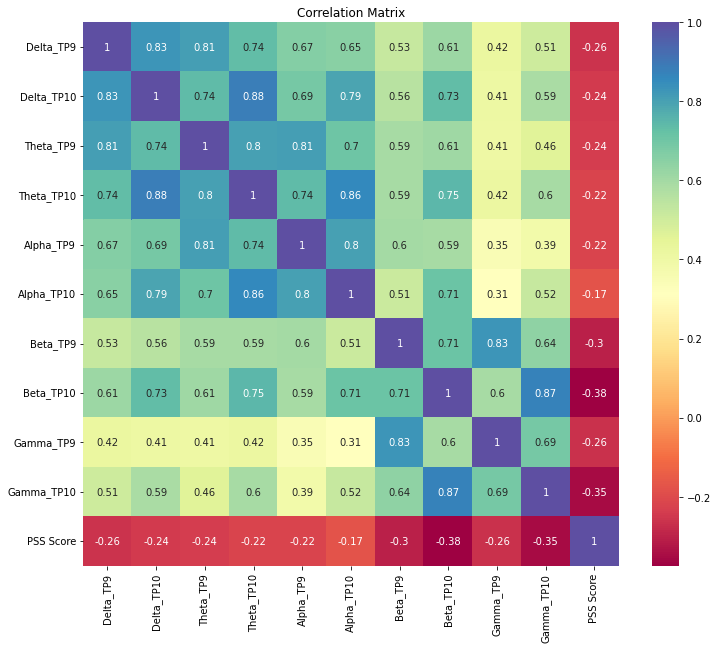

In [19]:
# Correlation matrix
corr = data.corr() 
plt.figure(figsize=(12,10))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")

In [20]:
corr_matrix = data.corr().round(2)
corr_matrix              

,Delta_TP9,Delta_TP10,Theta_TP9,Theta_TP10,Alpha_TP9,Alpha_TP10,Beta_TP9,Beta_TP10,Gamma_TP9,Gamma_TP10,PSS Score
Delta_TP9,1.00,0.83,0.81,0.74,0.67,0.65,0.53,0.61,0.42,0.51,-0.26
Delta_TP10,0.83,1.00,0.74,0.88,0.69,0.79,0.56,0.73,0.41,0.59,-0.24
Theta_TP9,0.81,0.74,1.00,0.80,0.81,0.70,0.59,0.61,0.41,0.46,-0.24
Theta_TP10,0.74,0.88,0.80,1.00,0.74,0.86,0.59,0.75,0.42,0.60,-0.22
Alpha_TP9,0.67,0.69,0.81,0.74,1.00,0.80,0.60,0.59,0.35,0.39,-0.22
Alpha_TP10,0.65,0.79,0.70,0.86,0.80,1.00,0.51,0.71,0.31,0.52,-0.17
Beta_TP9,0.53,0.56,0.59,0.59,0.60,0.51,1.00,0.71,0.83,0.64,-0.30
Beta_TP10,0.61,0.73,0.61,0.75,0.59,0.71,0.71,1.00,0.60,0.87,-0.38
Gamma_TP9,0.42,0.41,0.41,0.42,0.35,0.31,0.83,0.60,1.00,0.69,-0.26
Gamma_TP10,0.51,0.59,0.46,0.60,0.39,0.52,0.64,0.87,0.69,1.00,-0.35


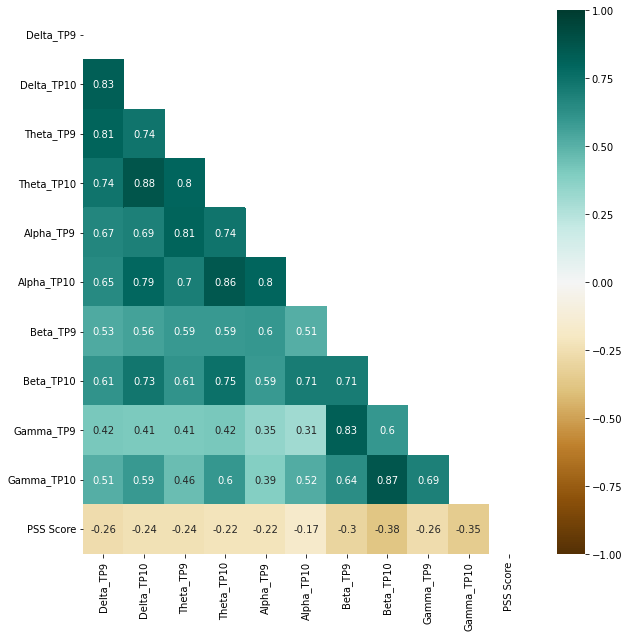

In [21]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, center=0, vmin=-1, vmax=1, mask=mask, annot=True, cmap='BrBG')
plt.show()

In [22]:
data.columns

Index(['Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10', 'Theta_TP9',
       'Theta_AF7', 'Theta_AF8', 'Theta_TP10', 'Alpha_TP9', 'Alpha_AF7',
       'Alpha_AF8', 'Alpha_TP10', 'Beta_TP9', 'Beta_AF7', 'Beta_AF8',
       'Beta_TP10', 'Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8', 'Gamma_TP10',
       'PSS Score'],
      dtype='object')

In [23]:
features = ["Delta_TP9", "Delta_TP10", "Theta_TP9", "Theta_TP10", "Alpha_TP9", "Alpha_TP10", "Beta_TP9",
            "Beta_TP10", "Gamma_TP9", "Gamma_TP10"]

In [24]:
cat_features = [feature for feature in data.columns if data[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('*'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  10
********************************************************************************
Categorical variables column name: ['Delta_AF7', 'Delta_AF8', 'Theta_AF7', 'Theta_AF8', 'Alpha_AF7', 'Alpha_AF8', 'Beta_AF7', 'Beta_AF8', 'Gamma_AF7', 'Gamma_AF8']


In [25]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  11
********************************************************************************
Numerical Variables Column:  ['Delta_TP9', 'Delta_TP10', 'Theta_TP9', 'Theta_TP10', 'Alpha_TP9', 'Alpha_TP10', 'Beta_TP9', 'Beta_TP10', 'Gamma_TP9', 'Gamma_TP10', 'PSS Score']


In [26]:
"""for col in cat_features[:-1]:
    plt.figure(figsize=(6,3), dpi=100)
    sns.countplot(data=data,x=col,hue ='PSS Score',palette='gist_rainbow_r')
    plt.legend(loc=(1.05,0.5))
"""

"for col in cat_features[:-1]:\n    plt.figure(figsize=(6,3), dpi=100)\n    sns.countplot(data=data,x=col,hue ='PSS Score',palette='gist_rainbow_r')\n    plt.legend(loc=(1.05,0.5))\n"

In [27]:
import numpy as np
import pandas as pd
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [28]:
outlier_datapoints = detect_outlier(data)
print(outlier_datapoints)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


UFuncTypeError: ignored

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
outliers_rows = lof.fit_predict(data)

In [ ]:
data.columns

In [29]:
X = data.drop(['PSS Score'], 1)
y = data['PSS Score']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [30]:
print(X.shape)
print(y.shape)

(1025304, 20)
(1025304,)


In [31]:
!pip install sklearn-genetic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 139 kB 4.9 MB/s 
     |████████████████████████████████| 115 kB 43.3 MB/s 


In [32]:
from genetic_selection import GeneticSelectionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [33]:
#estimator = DecisionTreeClassifier()
estimator = RandomForestClassifier(max_depth=6, random_state=0)
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="accuracy", max_features=5,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)

model = model.fit(X, y)
print('Features:', X.columns[model.support_])

ValueError: ignored

In [34]:
!pip install boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.7 MB/s 


In [35]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [36]:
#define the features
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values


from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values

lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

#view transformed values
#print(y_transformed)



forest = RandomForestClassifier(n_estimators=200, n_jobs=-1, class_weight='balanced')

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
 
# find all relevant features
feat_selector.fit(X, y_transformed)


ValueError: ignored

In [37]:
# substring to be searched
sub ='er'
 
# start var
start = 2
 
# creating and passing series to new column
data["Indexes"]= data["NAME"].str.find(sub, start)
 
# display
data.head()

KeyError: ignored

In [38]:
# import pandas
import pandas as pd

df = pd.DataFrame(data)

In [39]:
 col = df.columns

In [40]:
col

Index(['Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10', 'Theta_TP9',
       'Theta_AF7', 'Theta_AF8', 'Theta_TP10', 'Alpha_TP9', 'Alpha_AF7',
       'Alpha_AF8', 'Alpha_TP10', 'Beta_TP9', 'Beta_AF7', 'Beta_AF8',
       'Beta_TP10', 'Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8', 'Gamma_TP10',
       'PSS Score'],
      dtype='object')

In [41]:
print(col.str.contains('#NAME?', regex=False))


[False False False False False False False False False False False False
 False False False False False False False False False]


In [42]:
print(col.str.contains('NAME', regex=False))


[False False False False False False False False False False False False
 False False False False False False False False False]


# Feature Selection

In [43]:
features = ["Delta_TP9", "Delta_TP10", "Theta_TP9", "Theta_TP10", "Alpha_TP9", "Alpha_TP10", "Beta_TP9",
            "Beta_TP10", "Gamma_TP9", "Gamma_TP10"]

In [44]:
X = data[features]
y = data['PSS Score']

print(X.shape)
print(y.shape)

(1025304, 10)
(1025304,)


In [45]:
#Importing our ML toolkit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix,classification_report
from sklearn.svm import SVC
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((717712, 10), (307592, 10))

In [47]:
accuracy = {}

In [48]:
model1 = LogisticRegression(max_iter=500)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(accuracy_score(y_test, y_pred1))
accuracy[str(model1)] = accuracy_score(y_test, y_pred1)*100

0.42153567062862496


In [49]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           9       0.53      0.07      0.13     11002
          14       0.57      0.49      0.53     11127
          15       0.47      0.53      0.50     21928
          16       0.53      0.54      0.53     21959
          17       0.59      0.37      0.46     10859
          18       0.42      0.21      0.28     10982
          19       0.35      0.33      0.34     10980
          20       0.33      0.38      0.35     33054
          21       0.18      0.20      0.19     32909
          22       0.58      0.85      0.69     10988
          23       0.58      0.71      0.64     32989
          24       0.60      0.65      0.62     11048
          26       0.16      0.04      0.06     10840
          28       0.51      0.47      0.49     10987
          30       0.33      0.34      0.34     22095
          31       0.26      0.30      0.28     21893
          34       0.47      0.51      0.49     10982
          35       0.49    

In [50]:
y_pred_test = model1.predict(X_test)
y_pred_train = model1.predict(X_train)

test1 = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

train = pd.DataFrame({
    'Actual':y_train,
    'Y train predicted':y_pred_train
})

In [51]:
test1.sample(10)

,Actual,Y test predicted
392972,20,28
578996,31,35
208138,23,20
951148,30,31
552062,31,31
757244,14,14
253236,15,31
955539,22,23
592241,17,31
840739,15,16


In [52]:
model2 = DecisionTreeClassifier(max_depth=18)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(accuracy_score(y_test, y_pred2))
accuracy[str(model2)] = accuracy_score(y_test, y_pred2)*100

0.8581725142396421


In [53]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           9       0.94      0.74      0.83     11002
          14       0.80      0.88      0.84     11127
          15       0.95      0.91      0.93     21928
          16       0.96      0.86      0.91     21959
          17       0.70      0.75      0.72     10859
          18       0.66      0.66      0.66     10982
          19       0.84      0.80      0.82     10980
          20       0.90      0.88      0.89     33054
          21       0.71      0.85      0.77     32909
          22       1.00      1.00      1.00     10988
          23       0.89      0.89      0.89     32989
          24       0.94      0.83      0.88     11048
          26       0.81      0.65      0.72     10840
          28       0.99      0.97      0.98     10987
          30       0.95      0.89      0.92     22095
          31       0.71      0.87      0.78     21893
          34       0.99      0.88      0.93     10982
          35       0.95    

In [54]:
y_pred_test = model2.predict(X_test)
y_pred_train = model2.predict(X_train)

test2 = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

train = pd.DataFrame({
    'Actual':y_train,
    'Y train predicted':y_pred_train
})

In [55]:
test2.sample(10)

,Actual,Y test predicted
921926,30,30
993823,26,26
315151,9,9
171498,16,21
852832,34,16
91278,19,19
304776,9,9
621988,17,17
405341,21,21
296184,9,9


In [56]:
model3 = RandomForestClassifier(max_depth=18)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(accuracy_score(y_test, y_pred3))
accuracy[str(model3)] = accuracy_score(y_test, y_pred3)*100

0.9888358604905199


In [57]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           9       1.00      0.97      0.98     11002
          14       0.96      1.00      0.98     11127
          15       1.00      0.99      0.99     21928
          16       1.00      0.99      0.99     21959
          17       0.94      0.99      0.96     10859
          18       0.93      1.00      0.96     10982
          19       1.00      0.98      0.99     10980
          20       0.99      0.99      0.99     33054
          21       0.99      0.99      0.99     32909
          22       1.00      1.00      1.00     10988
          23       1.00      0.99      0.99     32989
          24       1.00      0.98      0.99     11048
          26       0.99      0.98      0.99     10840
          28       1.00      1.00      1.00     10987
          30       1.00      0.99      1.00     22095
          31       0.97      0.99      0.98     21893
          34       1.00      0.99      0.99     10982
          35       1.00    

In [58]:
y_pred_test = model3.predict(X_test)
y_pred_train = model3.predict(X_train)

test3 = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

train = pd.DataFrame({
    'Actual':y_train,
    'Y train predicted':y_pred_train
})

In [59]:
test3.sample(10)

,Actual,Y test predicted
336199,23,23
474507,20,20
44376,21,21
851480,34,34
530927,18,18
993855,26,26
476219,28,28
93232,19,19
458247,20,20
572447,31,31


In [1]:

"""# import SVC classifier
from sklearn.svm import SVC

# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

# instantiate classifier with default hyperparameters
model4=SVC() 

# fit classifier to training set
model4.fit(X_train,y_train)
y_pred4 = model4.predict(X_test)
print(accuracy_score(y_test, y_pred3))
accuracy[str(model4)] = accuracy_score(y_test, y_pred4)*100
"""

'# import SVC classifier\nfrom sklearn.svm import SVC\n\n# import metrics to compute accuracy\nfrom sklearn.metrics import accuracy_score\n\n# instantiate classifier with default hyperparameters\nmodel4=SVC() \n\n# fit classifier to training set\nmodel4.fit(X_train,y_train)\ny_pred4 = model4.predict(X_test)\nprint(accuracy_score(y_test, y_pred3))\naccuracy[str(model4)] = accuracy_score(y_test, y_pred4)*100\n'

In [2]:
#print(classification_report(y_test,y_pred4))

In [3]:
"""
y_pred_test = model4.predict(X_test)
y_pred_train = model4.predict(X_train)

test4 = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

train = pd.DataFrame({
    'Actual':y_train,
    'Y train predicted':y_pred_train
})
"""

"\ny_pred_test = model4.predict(X_test)\ny_pred_train = model4.predict(X_train)\n\ntest4 = pd.DataFrame({\n    'Actual':y_test,\n    'Y test predicted':y_pred_test\n})\n\ntrain = pd.DataFrame({\n    'Actual':y_train,\n    'Y train predicted':y_pred_train\n})\n"

In [4]:
#test4.sample(10)

In [5]:
"""
model4 = GradientBoostingClassifier( learning_rate=0.1, max_depth=18) # n_estimators=500,
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(accuracy_score(y_test, y_pred4))
accuracy[str(model4)] = accuracy_score(y_test, y_pred4)*100
"""

'\nmodel4 = GradientBoostingClassifier( learning_rate=0.1, max_depth=18) # n_estimators=500,\nmodel4.fit(X_train, y_train)\ny_pred4 = model4.predict(X_test)\nprint(accuracy_score(y_test, y_pred4))\naccuracy[str(model4)] = accuracy_score(y_test, y_pred4)*100\n'

In [6]:
#print(classification_report(y_test,y_pred4))

In [7]:
"""
y_pred_test = model4.predict(X_test)
y_pred_train = model4.predict(X_train)

test4 = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

train = pd.DataFrame({
    'Actual':y_train,
    'Y train predicted':y_pred_train
})
"""

"\ny_pred_test = model4.predict(X_test)\ny_pred_train = model4.predict(X_train)\n\ntest4 = pd.DataFrame({\n    'Actual':y_test,\n    'Y test predicted':y_pred_test\n})\n\ntrain = pd.DataFrame({\n    'Actual':y_train,\n    'Y train predicted':y_pred_train\n})\n"

In [8]:
#test4.sample(10)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [10]:
model5 = LinearRegression()
model5.fit(X_train, y_train)
y_pred5 = model2.predict(X_test)
print(accuracy_score(y_test, y_pred2))
accuracy[str(model5)] = accuracy_score(y_test, y_pred2)*100

NameError: ignored

In [107]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           9       0.94      0.74      0.83     11002
          14       0.80      0.88      0.84     11127
          15       0.95      0.91      0.93     21928
          16       0.96      0.86      0.91     21959
          17       0.70      0.75      0.72     10859
          18       0.66      0.66      0.66     10982
          19       0.84      0.80      0.82     10980
          20       0.90      0.88      0.89     33054
          21       0.71      0.85      0.77     32909
          22       1.00      1.00      1.00     10988
          23       0.89      0.89      0.89     32989
          24       0.94      0.83      0.88     11048
          26       0.81      0.65      0.72     10840
          28       0.99      0.97      0.98     10987
          30       0.95      0.89      0.92     22095
          31       0.71      0.87      0.78     21893
          34       0.99      0.88      0.93     10982
          35       0.95    

In [108]:
y_pred_test = model5.predict(X_test)
y_pred_train = model5.predict(X_train)

test5 = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

train = pd.DataFrame({
    'Actual':y_train,
    'Y train predicted':y_pred_train
})

In [109]:
test5.sample(10)

,Actual,Y test predicted
250589,15,22.592454
622648,24,26.579429
592738,17,22.842040
364854,23,24.360245
357006,23,23.033907
923475,30,24.261349
388371,20,22.384945
843907,34,25.890393
703235,31,20.522135
547423,18,22.529956


In [116]:
# Standardize features
scaler = StandardScaler()
#features_standardized = scaler.fit_transform(X_train)

# Create one-vs-rest logistic regression object
logistic_regression = LogisticRegression(random_state=0, multi_class="ovr")

# Train model
model6 = logistic_regression.fit(X_train, y_train)
y_pred6 = model6.predict(X_test)
print(accuracy_score(y_test, y_pred6))
accuracy[str(model6)] = accuracy_score(y_test, y_pred6)*100

0.4041262451559208


In [117]:
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           9       0.94      0.01      0.03     11002
          14       0.56      0.35      0.43     11127
          15       0.42      0.55      0.48     21928
          16       0.50      0.54      0.52     21959
          17       0.68      0.31      0.43     10859
          18       0.33      0.14      0.19     10982
          19       0.33      0.20      0.25     10980
          20       0.30      0.41      0.35     33054
          21       0.15      0.18      0.16     32909
          22       0.57      0.75      0.65     10988
          23       0.52      0.73      0.61     32989
          24       0.56      0.66      0.61     11048
          26       0.12      0.00      0.00     10840
          28       0.60      0.44      0.51     10987
          30       0.34      0.36      0.35     22095
          31       0.30      0.27      0.28     21893
          34       0.51      0.53      0.52     10982
          35       0.52    

In [118]:
y_pred_test = model6.predict(X_test)
y_pred_train = model6.predict(X_train)

test6 = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

train = pd.DataFrame({
    'Actual':y_train,
    'Y train predicted':y_pred_train
})

In [119]:
test6.sample(10)

,Actual,Y test predicted
306811,9,16
841419,15,30
876775,34,22
950074,30,20
180992,16,35
940767,30,20
794225,21,14
280970,23,23
403908,21,21
844369,34,34


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(10)
knn.fit(X_train,y_train)

train_scores.append(knn.score(X_train,y_train))
test_scores.append(knn.score(X_test,y_test))

In [1]:
"""from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Flatten())
network.add(layers.Dense(512, activation='relu', input_shape=(100,)))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))
"""

"from keras import models\nfrom keras import layers\n\nnetwork = models.Sequential()\nnetwork.add(layers.Flatten())\nnetwork.add(layers.Dense(512, activation='relu', input_shape=(100,)))\nnetwork.add(layers.Dense(256, activation='relu'))\nnetwork.add(layers.Dense(128, activation='relu'))\nnetwork.add(layers.Dense(1, activation='sigmoid'))\n"

In [5]:
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=10, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam',metrics = ['accuracy'])
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 60, epochs = 10, verbose=1)

NameError: ignored

In [126]:
network.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'] )

In [127]:
network.fit(X_train, y_train , batch_size = 64 ,epochs = 10 )

Epoch 1/10
11215/11215 [==============================] - 32s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 2/10
 2765/11215 [======>.......................] - ETA: 22s - loss: nan - accuracy: 0.0000e+00

KeyboardInterrupt: ignored

In [98]:
accuracy

{'LogisticRegression(max_iter=200)': 42.19030403911675,
 'RandomForestClassifier(max_depth=6)': 48.564331972222945,
 'LogisticRegression(max_iter=500)': 42.15356706286249,
 'DecisionTreeClassifier(max_depth=3)': 26.164854742646103,
 'DecisionTreeClassifier(max_depth=6)': 39.29621056464407,
 'DecisionTreeClassifier(max_depth=12)': 65.12815677910999,
 'DecisionTreeClassifier(max_depth=18)': 85.81660121199512,
 'RandomForestClassifier(max_depth=18)': 98.85595204036515}

In [ ]:
algos = list(accuracy.keys())
accu_val = list(accuracy.values())

plt.bar(algos, accu_val, width=0.4)
plt.title('Accuracy Differences')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()
